In [9]:
#import du df
import pandas as pd
import numpy as np
df=pd.read_csv("df_full_full_catpos.csv")
df.drop_duplicates(inplace=True)

In [10]:
#transfo
df.drop(['CODGEO', 'LIBGEO',"nom_REG", 'nom_DEP'],axis=1,inplace=True)

In [11]:
#création des ensembles
X = df.drop('salaire_moyen', axis=1) 
y = df['salaire_moyen']

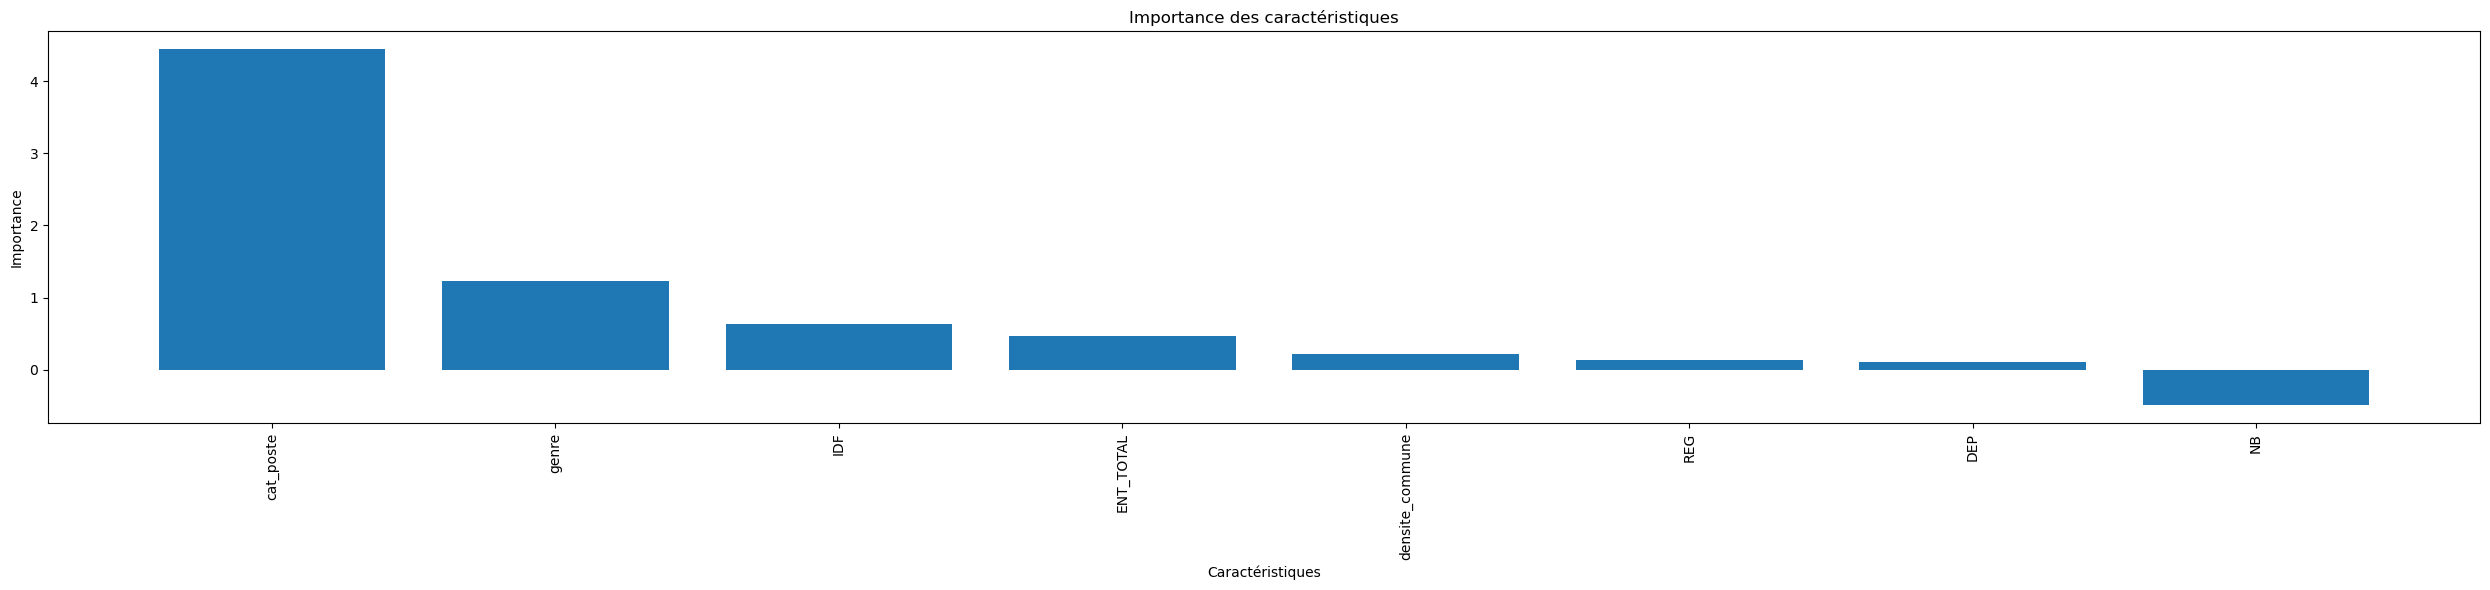

Linear Regression
r2_train 0.7326031801321391
r2_test 0.7397277062432484
r2_full 0.7343982905611257
le mae train est : 2.221552699928151
le mae test est : 2.218190867424943 

le mse train est : 7.8967505683102965
le mse test est : 7.725284438752639 

le rmse train est : 2.8101157571015283
le rmse test est : 2.8101157571015283


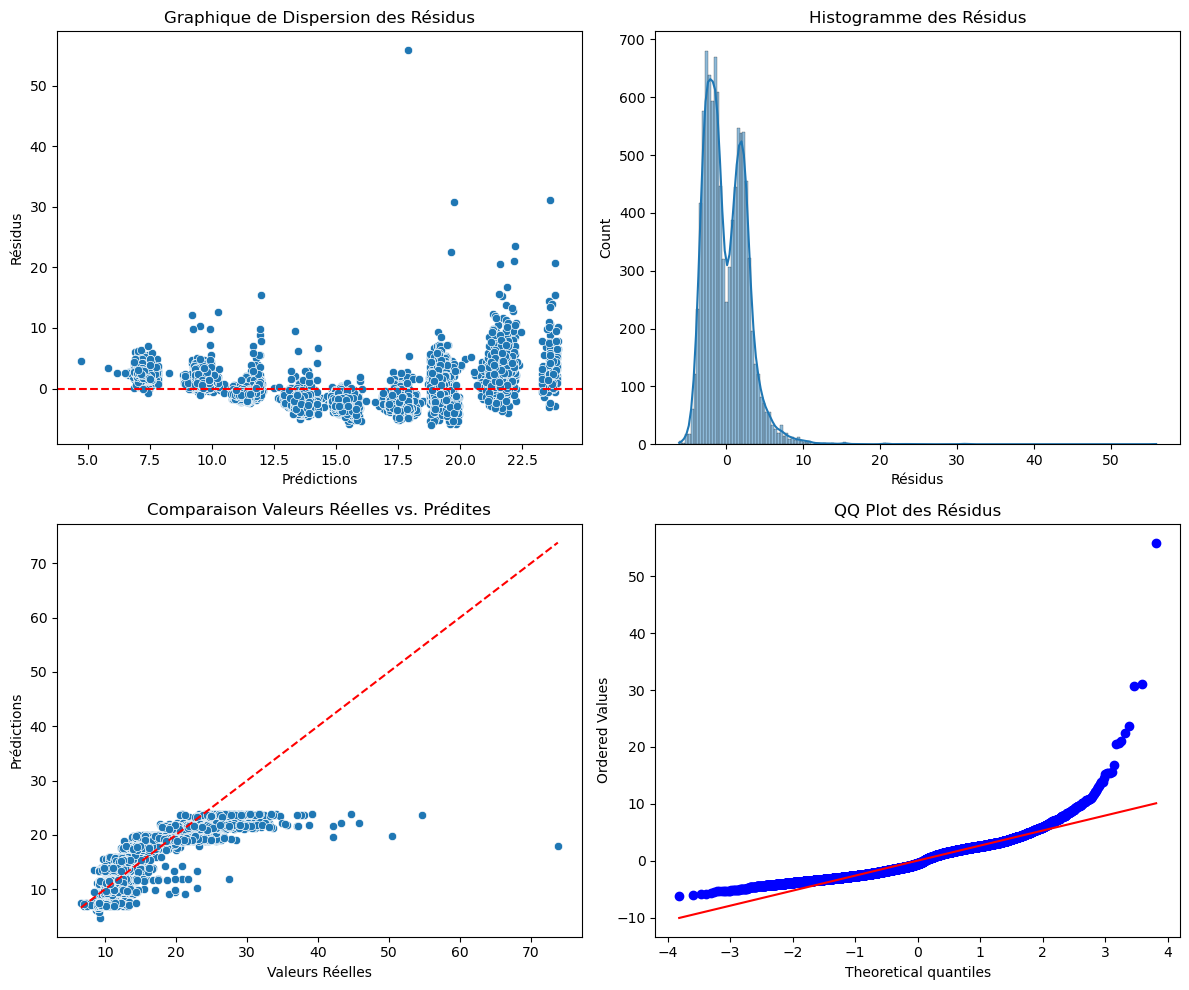

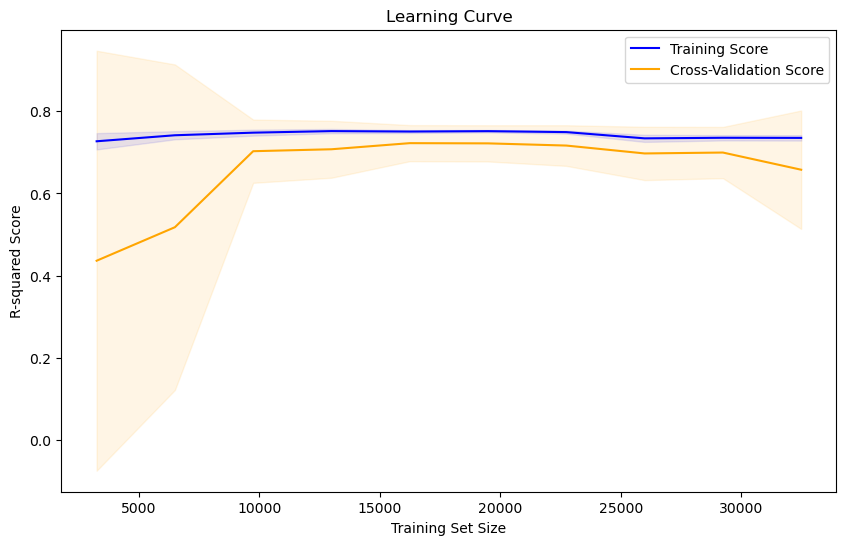

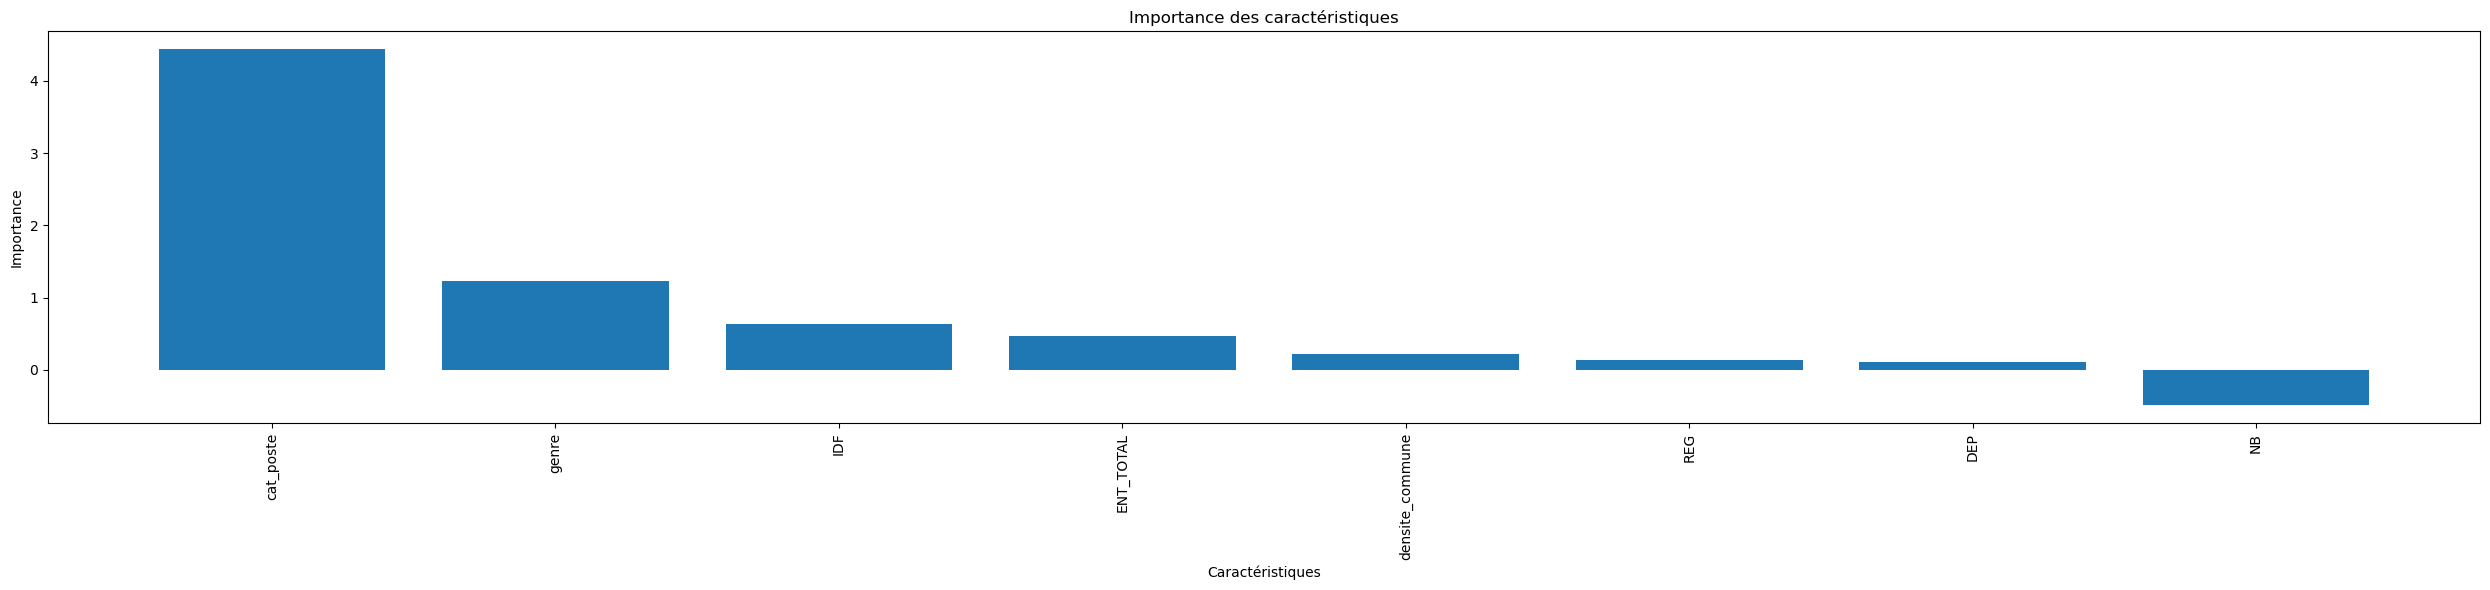

Ridge
r2_train 0.7326031789611904
r2_test 0.7397279591569115
r2_full 0.7343983531506469
le mae train est : 2.2215345065711194
le mae test est : 2.218173153607928 

le mse train est : 7.896750602890701
le mse test est : 7.725276931883744 

le rmse train est : 2.810115763254372
le rmse test est : 2.810115763254372


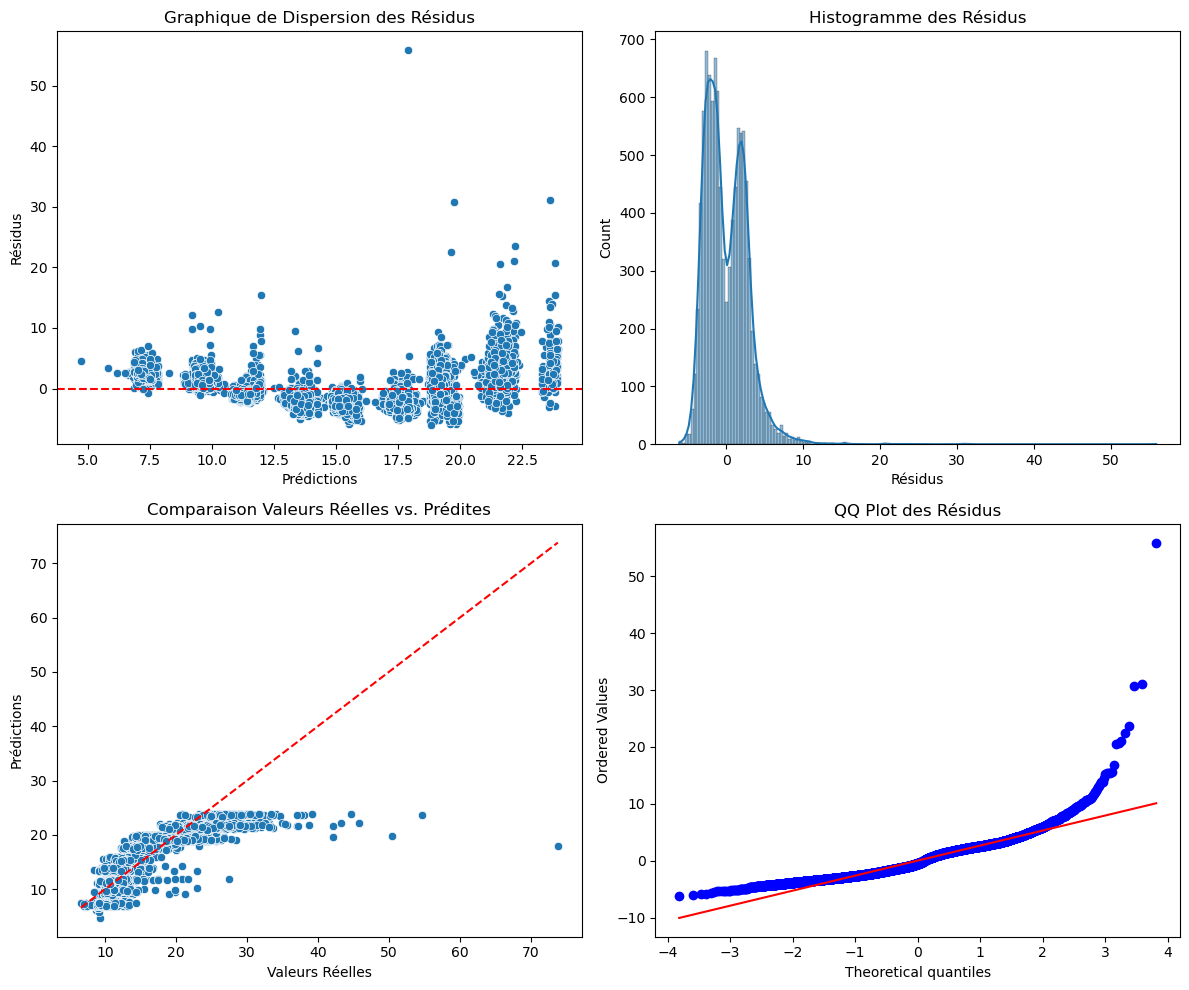

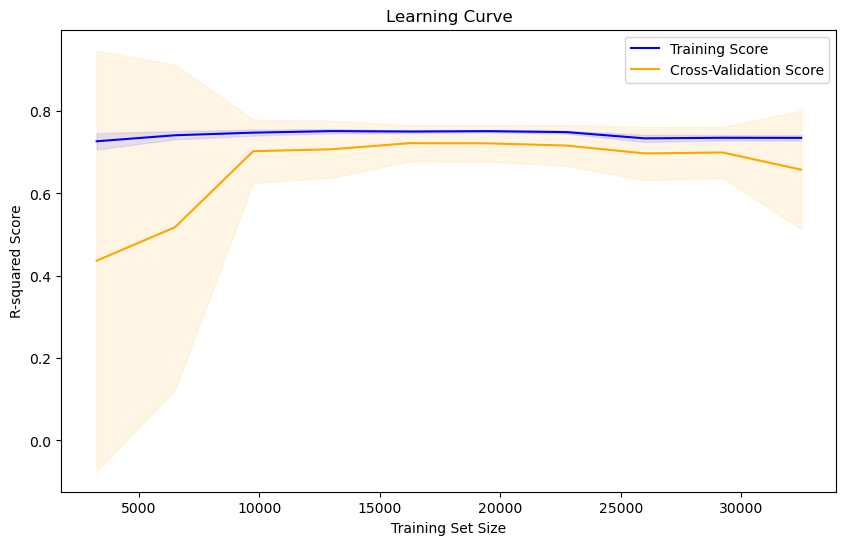

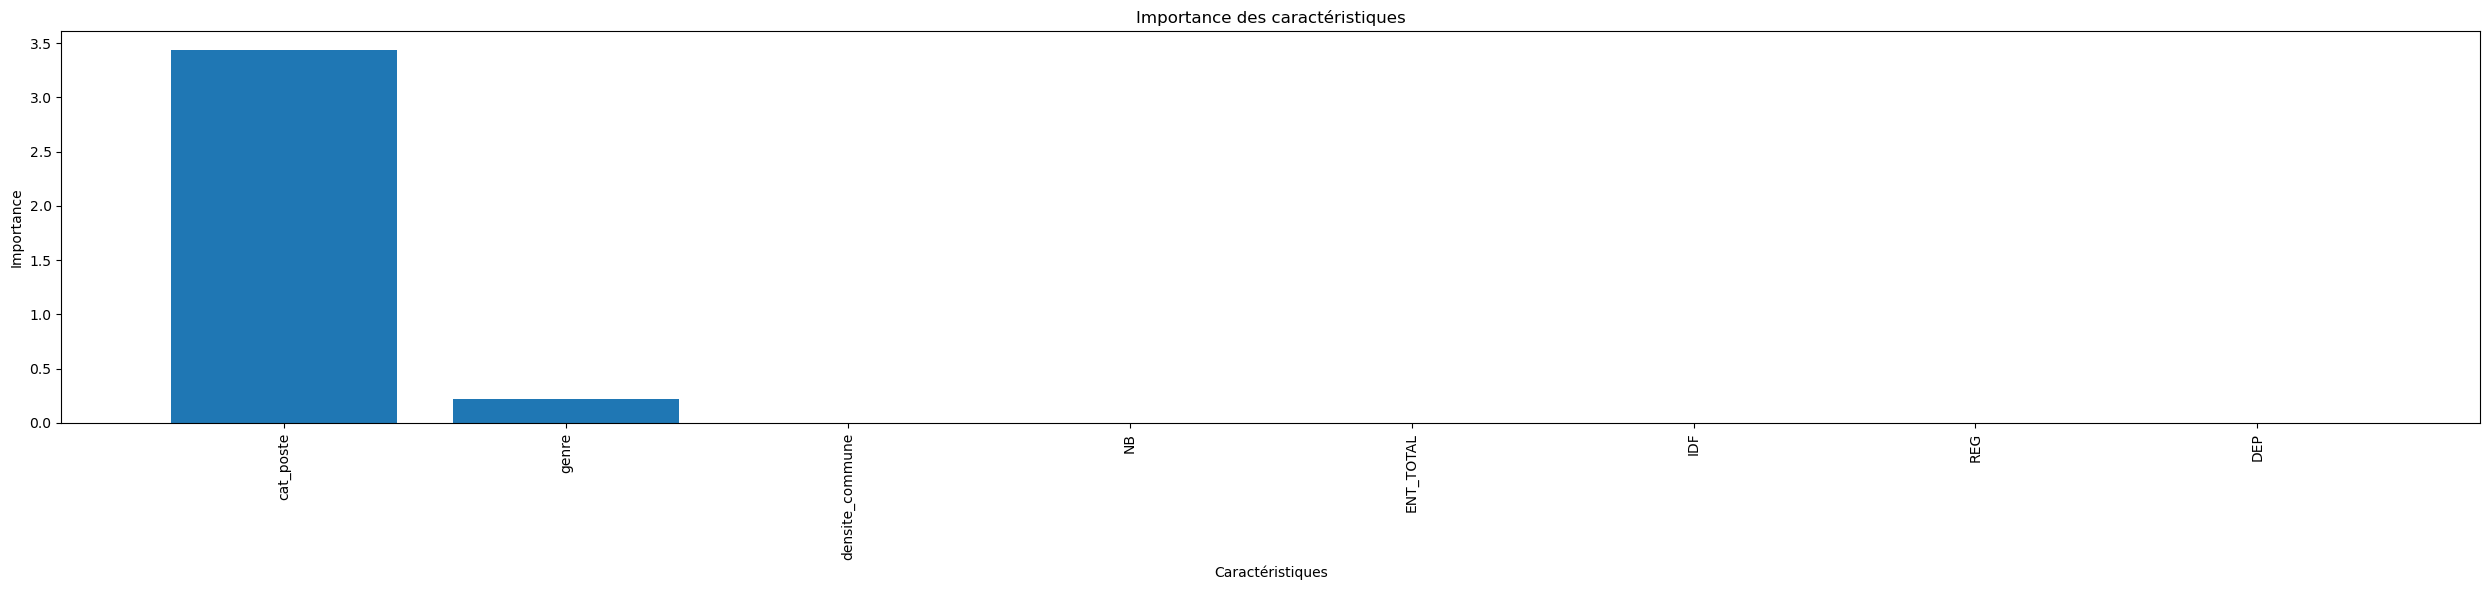

Lasso
r2_train 0.6491056426999263
r2_test 0.6575288725578587
r2_full 0.6512289220579731
le mae train est : 2.3155693007496847
le mae test est : 2.303776710578819 

le mse train est : 10.362595997946192
le mse test est : 10.165073021654326 

le rmse train est : 3.2190986312858128
le rmse test est : 3.2190986312858128


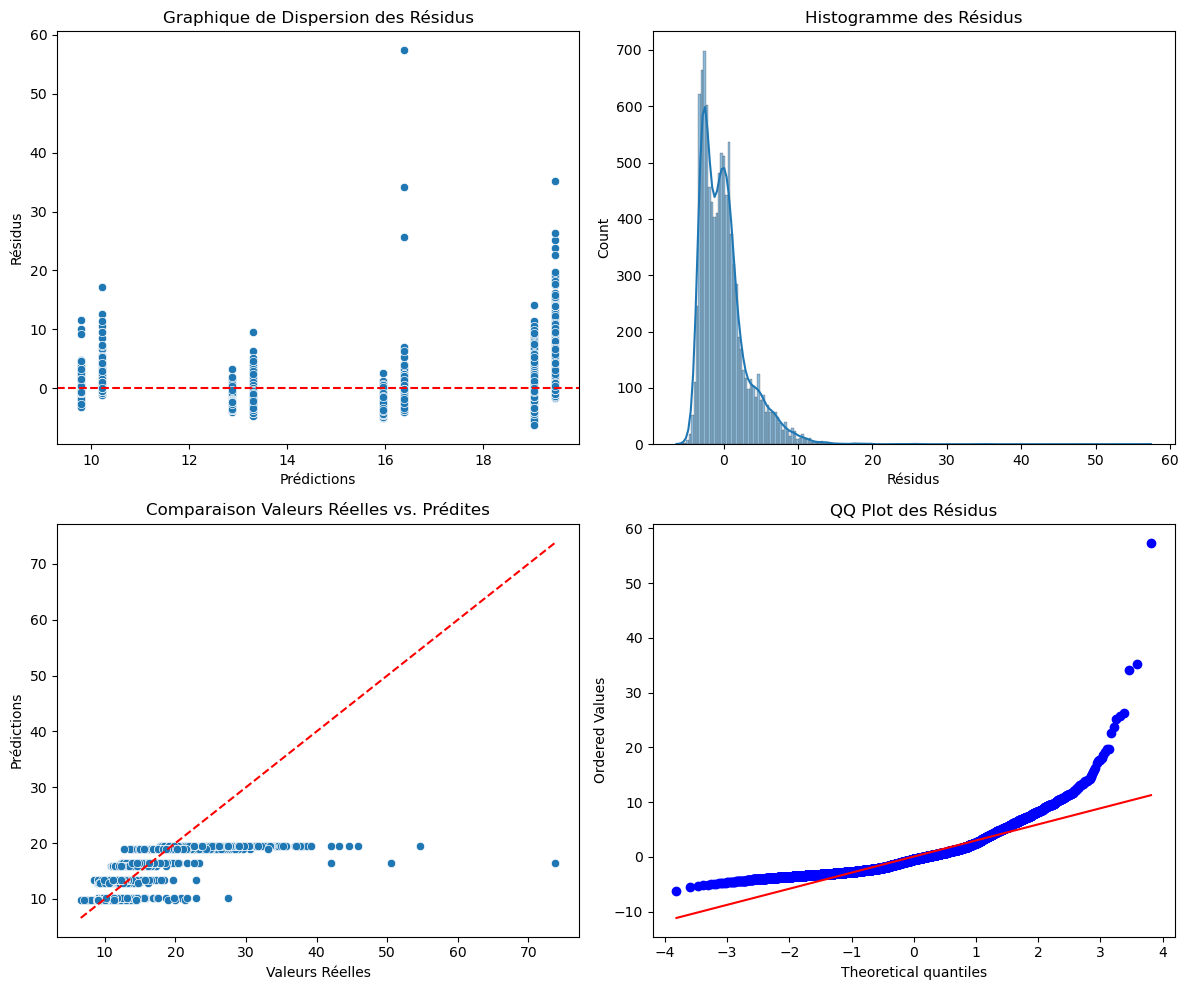

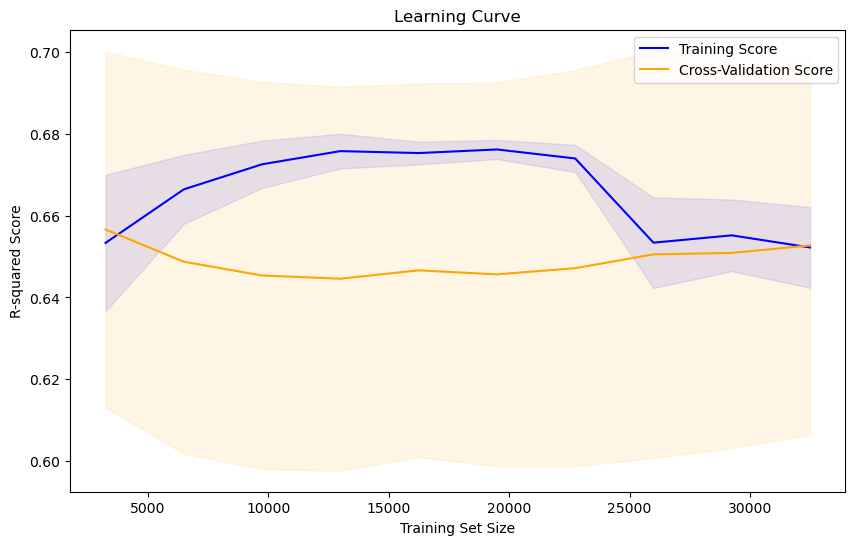

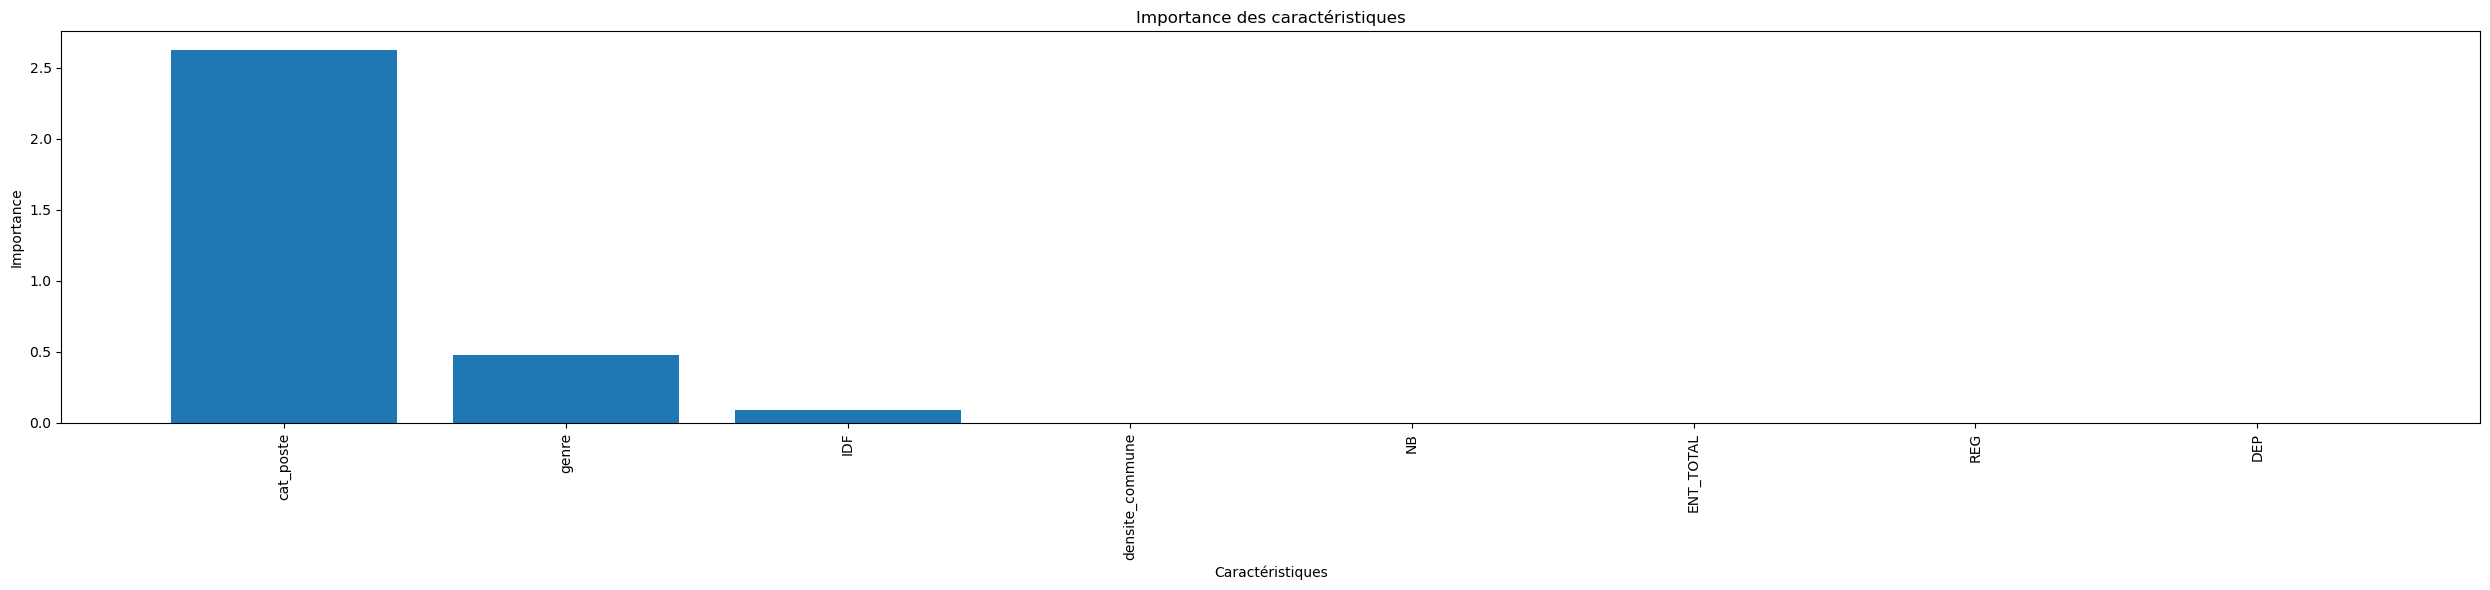

Elastic Net
r2_train 0.5904610905153442
r2_test 0.5986091486203695
r2_full 0.5925169120799666
le mae train est : 2.4955853981901592
le mae test est : 2.492362616600735 

le mse train est : 12.094484211952446
le mse test est : 11.91390160382868 

le rmse train est : 3.477712497023359
le rmse test est : 3.477712497023359


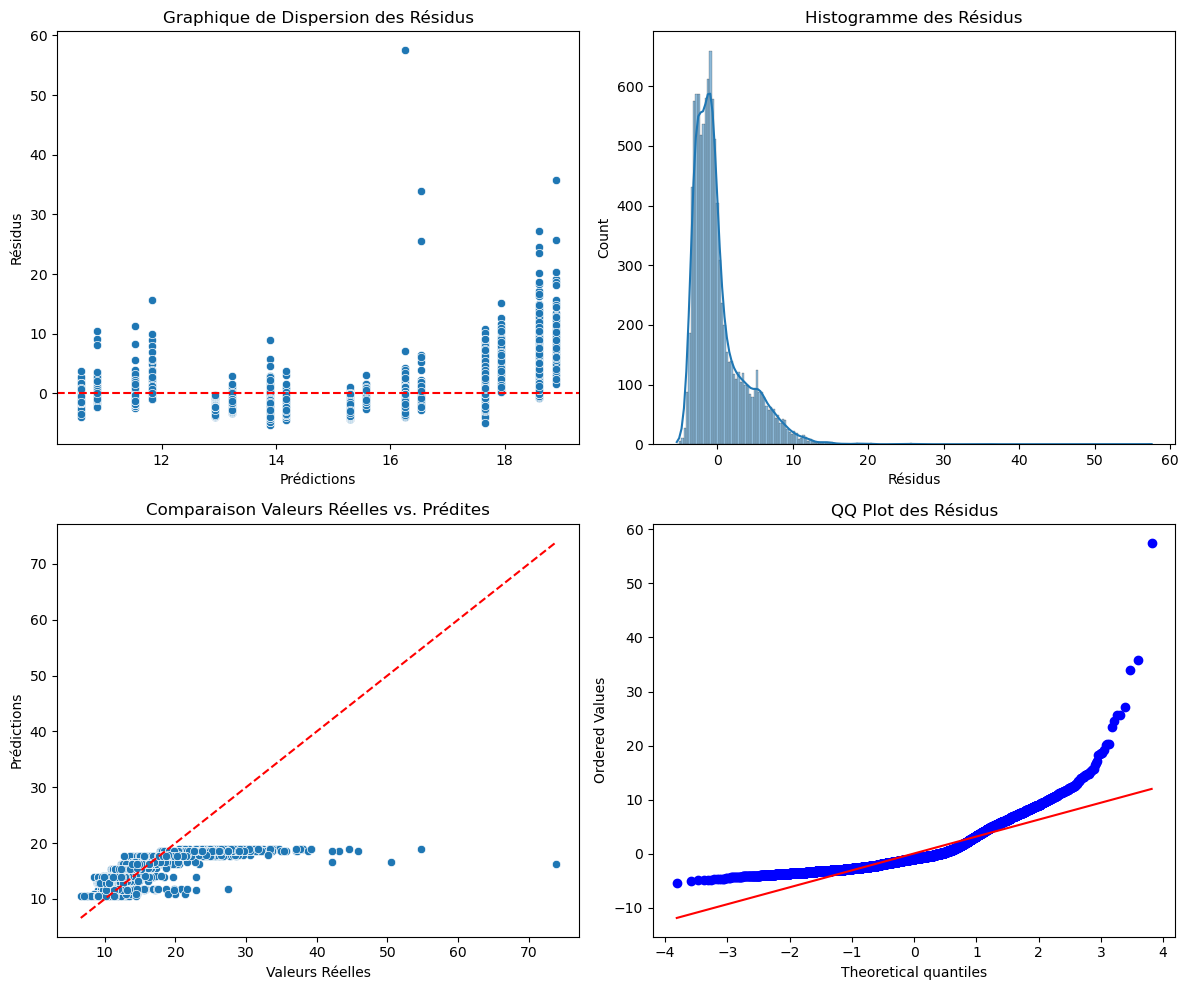

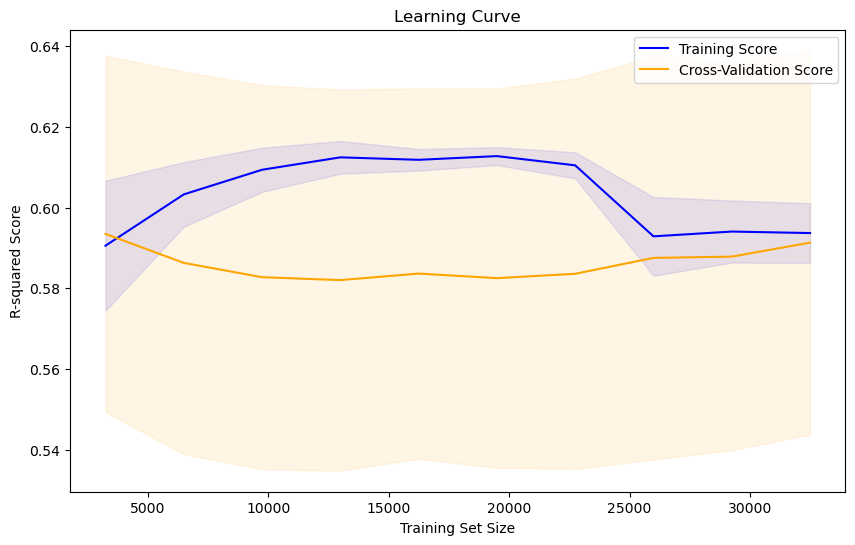

KNN
r2_train 0.9275099691412609
r2_test 0.8983390096486699
r2_full 0.9201917280867924
le mae train est : 0.8117705323526835
le mae test est : 0.9680391384292093 

le mse train est : 2.1407722525026998
le mse test est : 3.017455509587602 

le rmse train est : 1.4631378104958876
le rmse test est : 1.4631378104958876


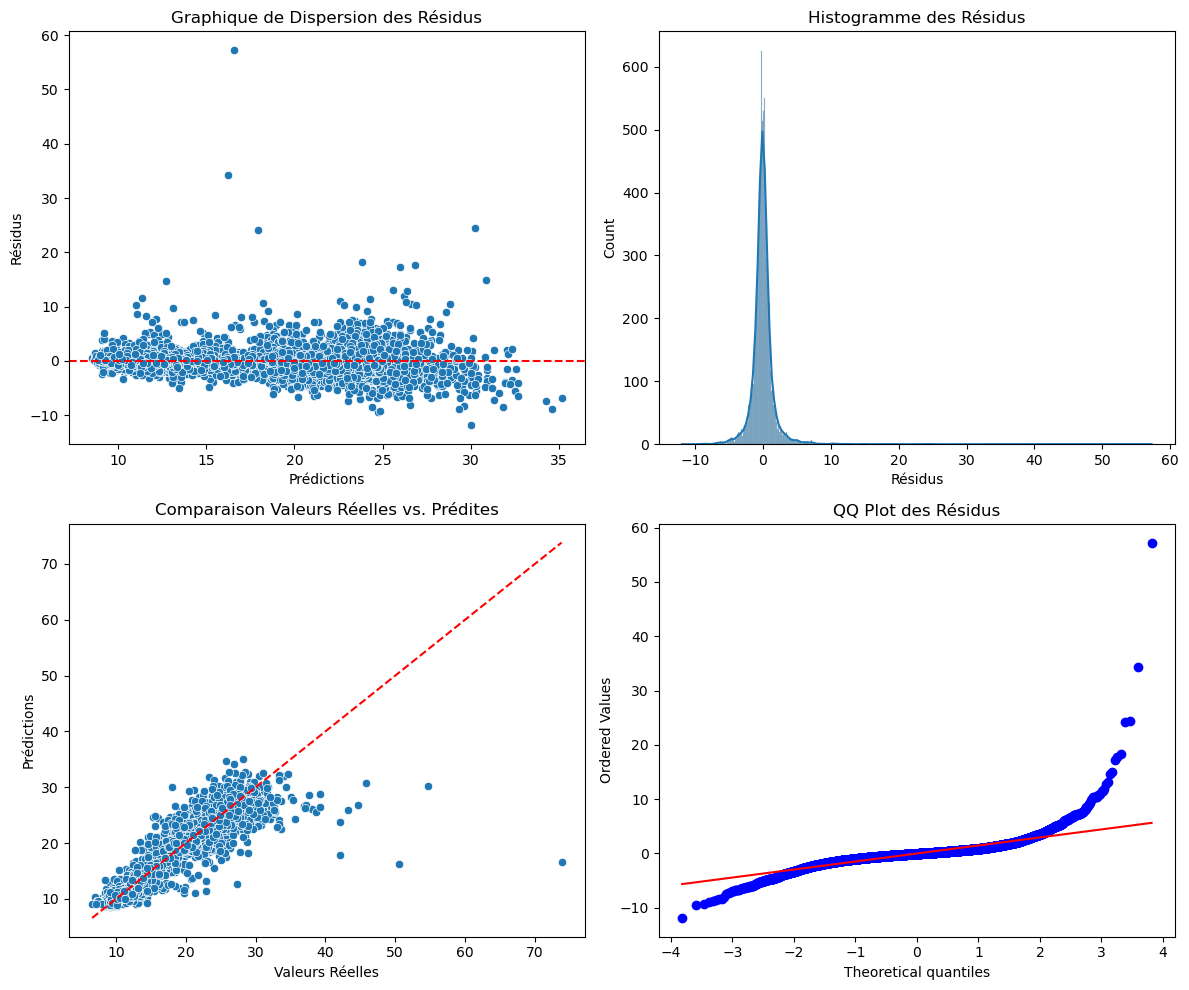

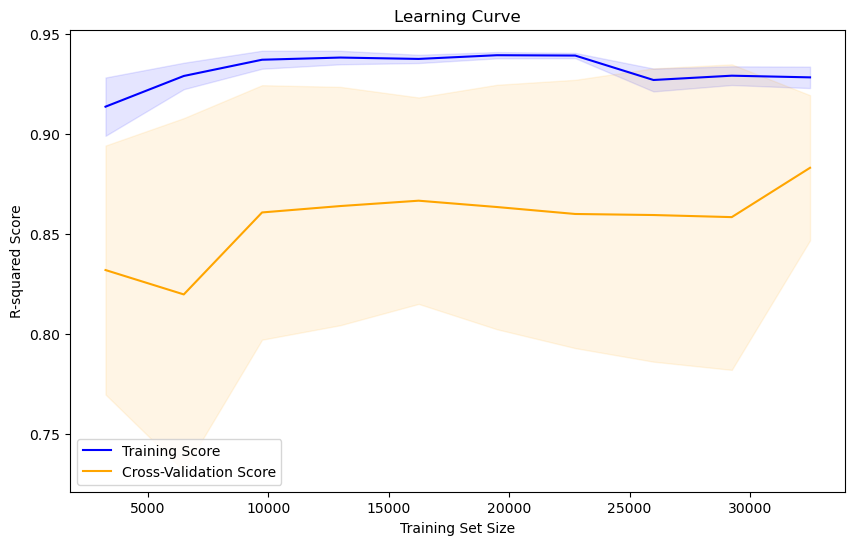

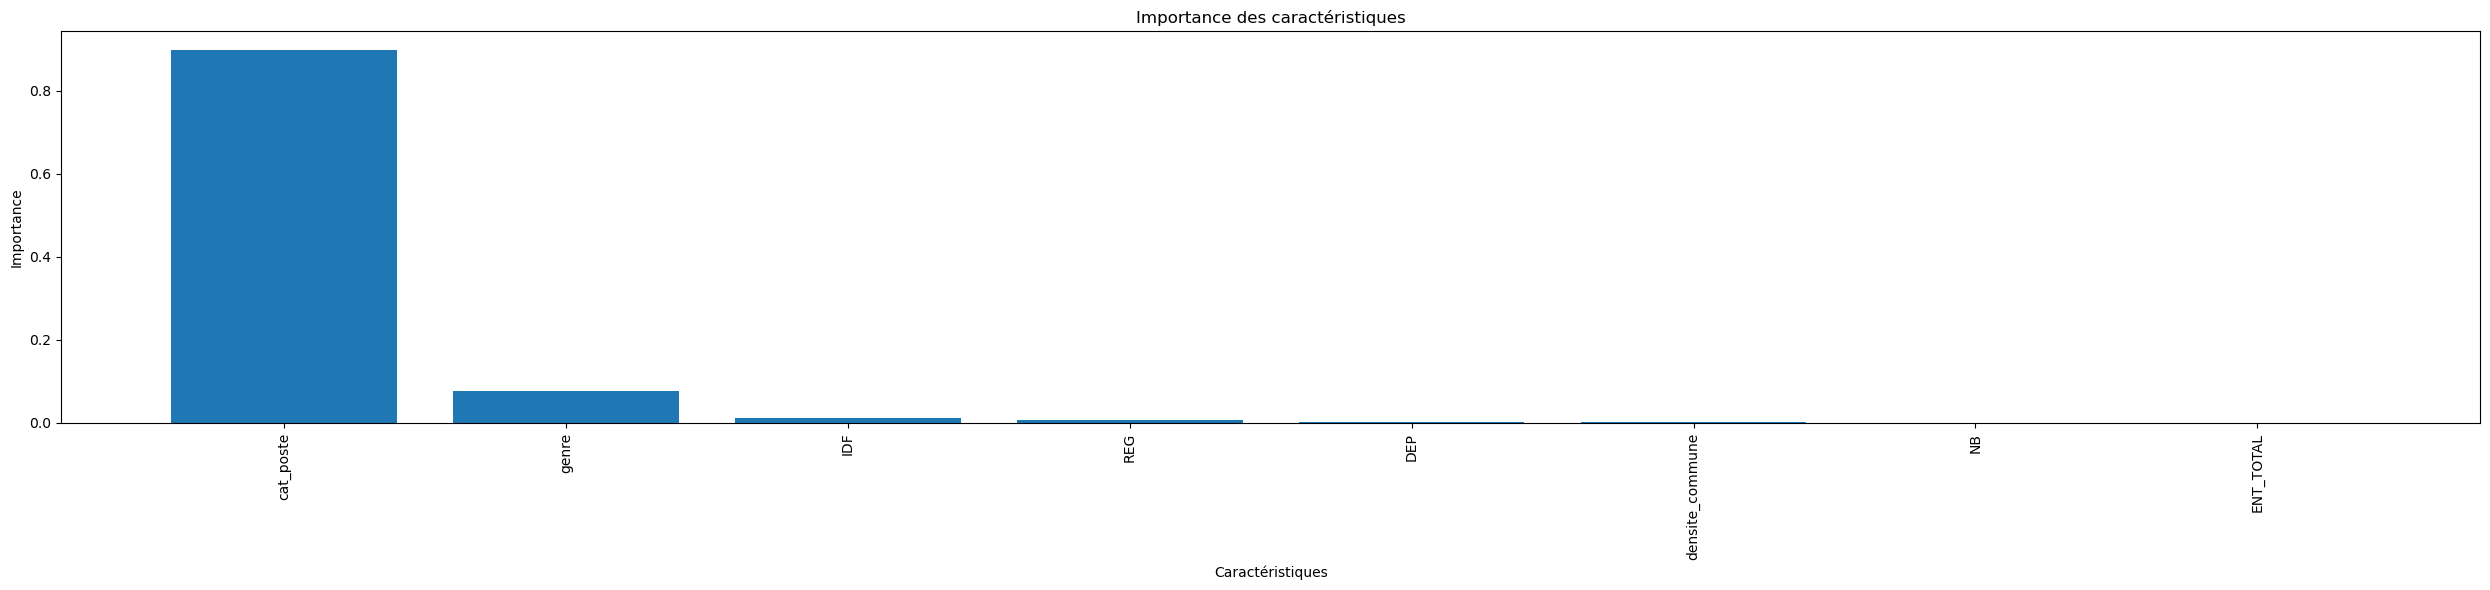

Decision Tree
r2_train 0.9021124772616799
r2_test 0.903395886667482
r2_full 0.902437199402747
le mae train est : 0.9756032076506957
le mae test est : 0.9787443092526271 

le mse train est : 2.8908098129076705
le mse test est : 2.867359574372054 

le rmse train est : 1.7002381635840522
le rmse test est : 1.7002381635840522


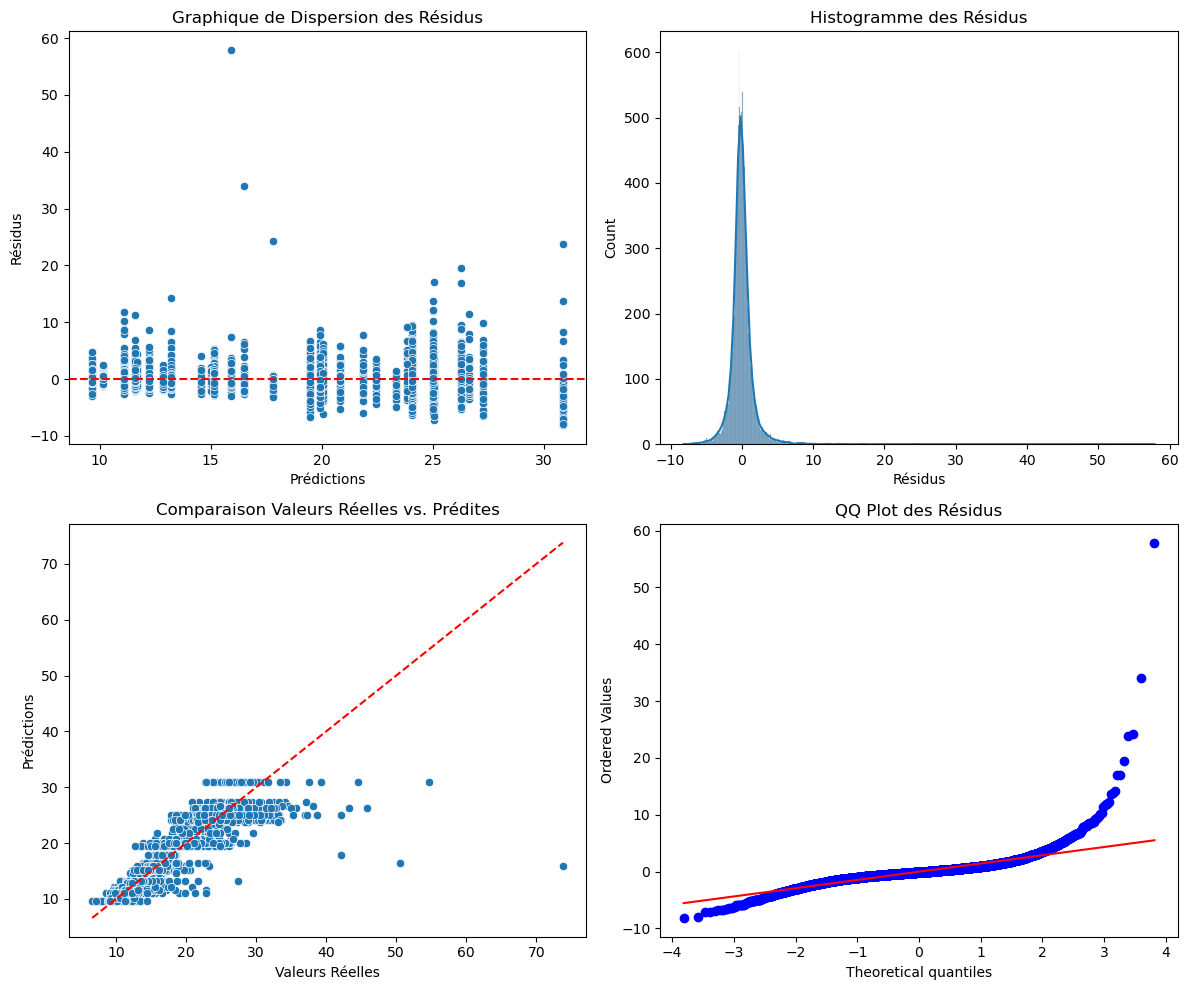

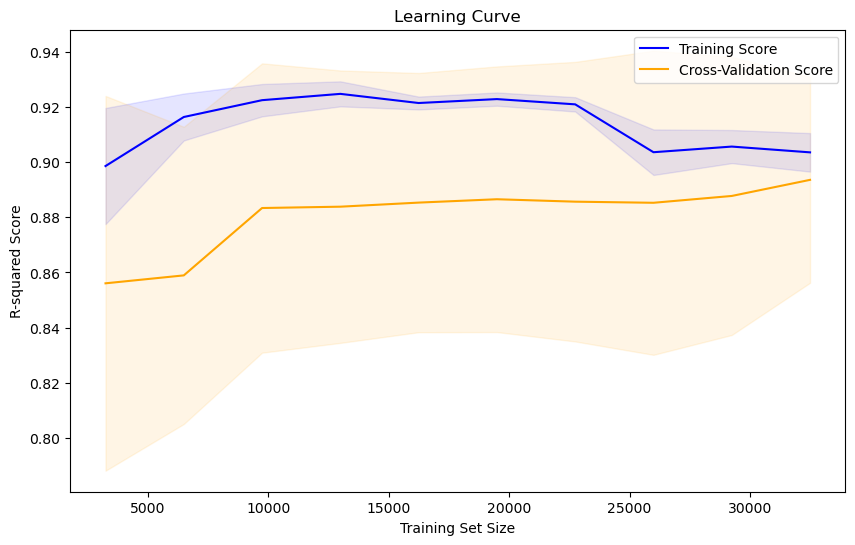

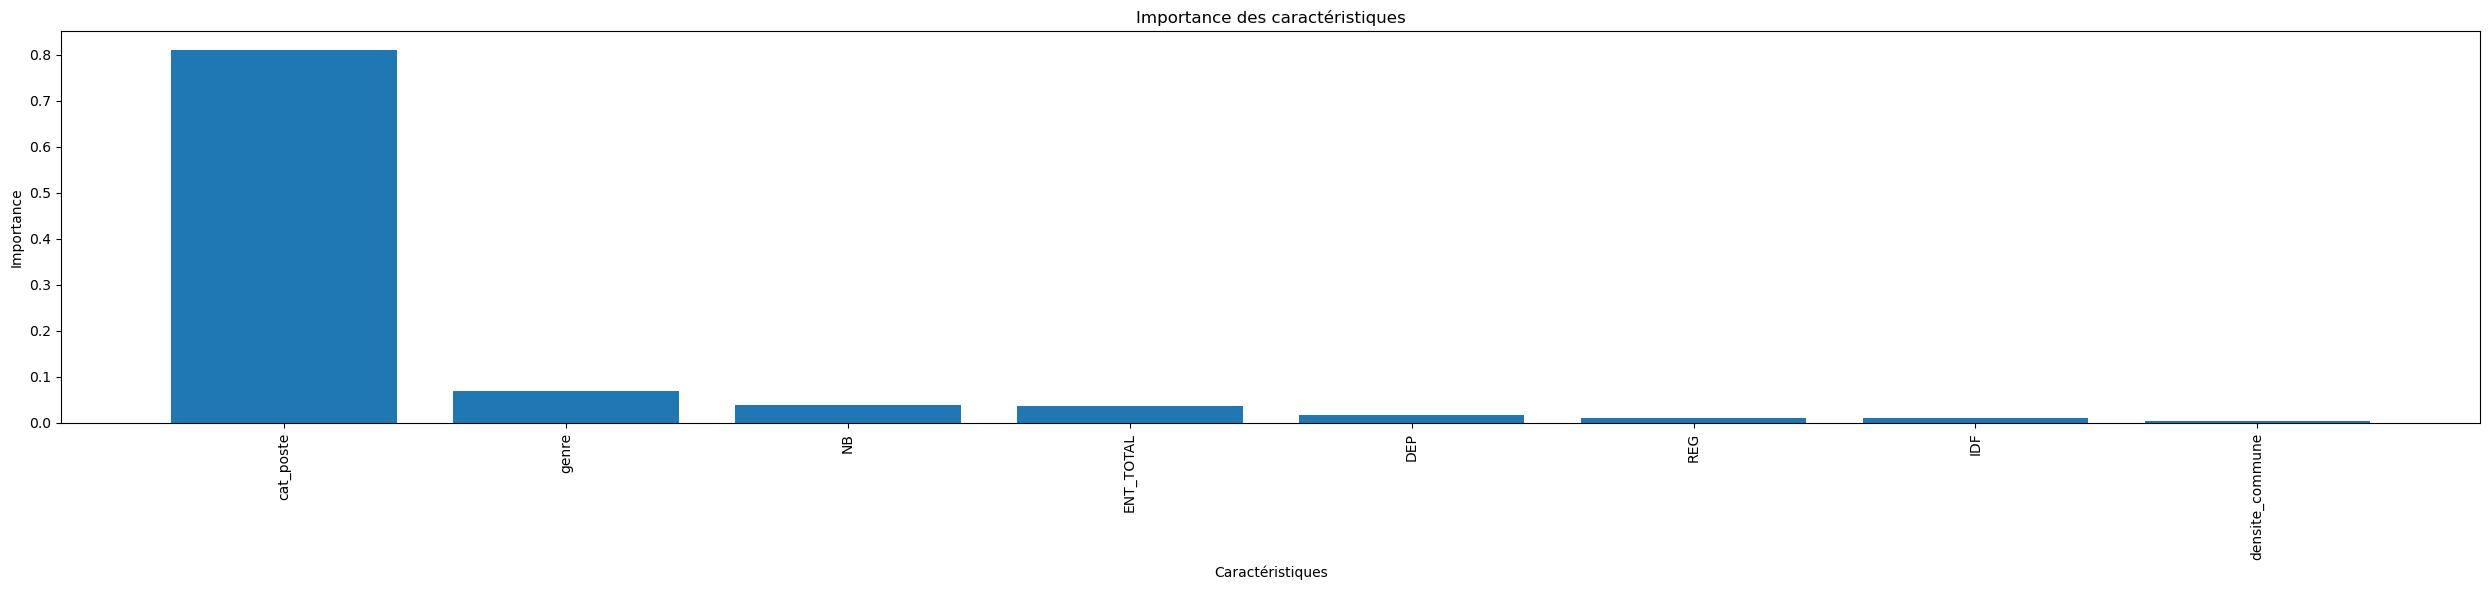

Random Forest
r2_train 0.9871028935469729
r2_test 0.9072732549898317
r2_full 0.967070654640933
le mae train est : 0.3392255275369933
le mae test est : 0.9242276727081693 

le mse train est : 0.38087675374310487
le mse test est : 2.7522732825059113 

le rmse train est : 0.6171521317658272
le rmse test est : 0.6171521317658272


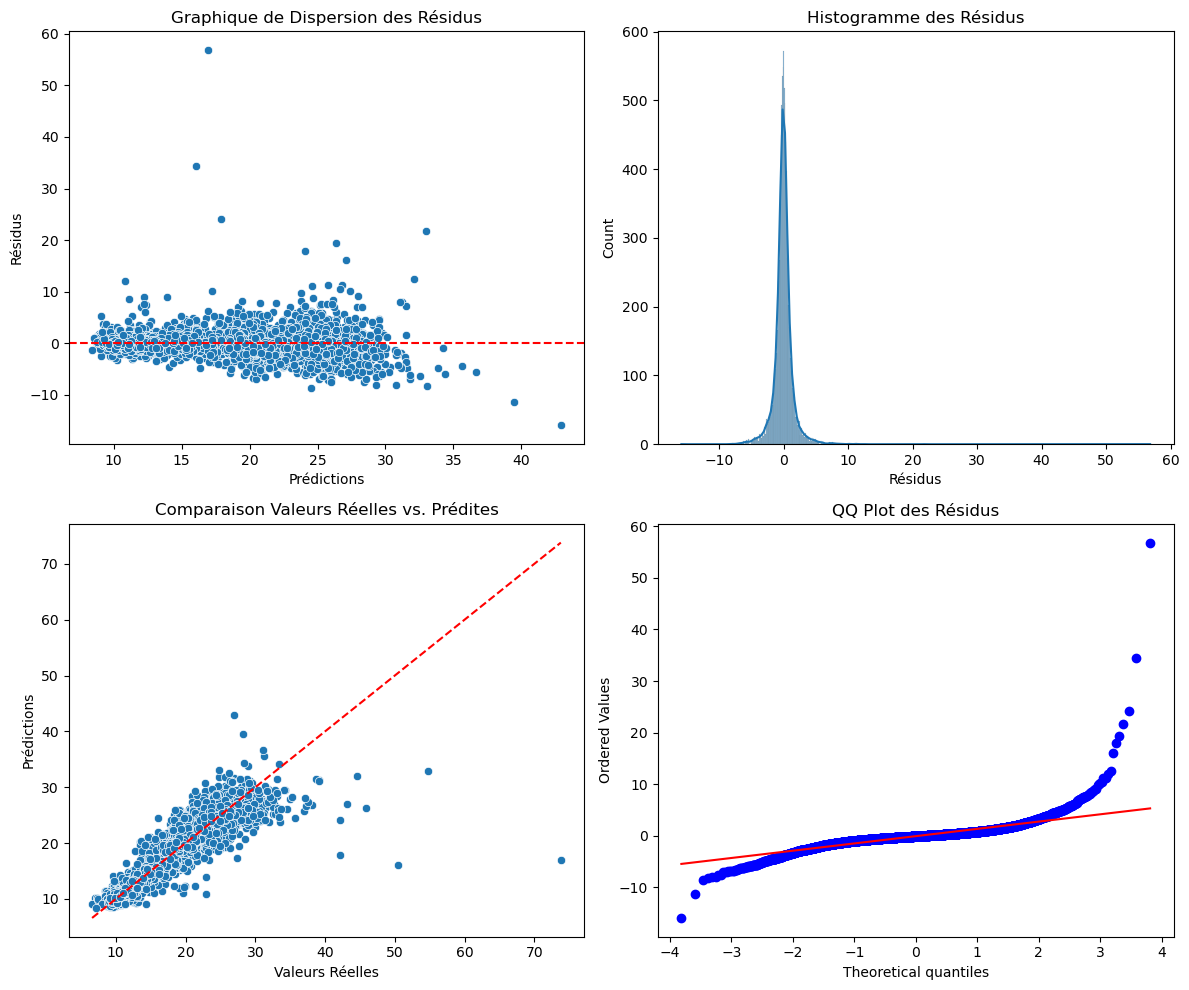

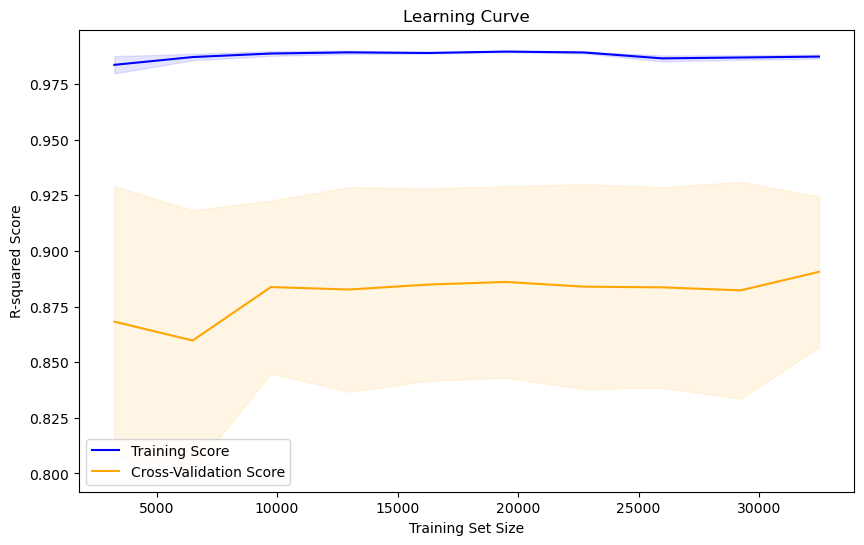

SVR Support Vectors Coefficients:
[[10. 10. 10. ... 10. 10. 10.]]
SVR
r2_train 0.9035842466512756
r2_test 0.9072732105294649
r2_full 0.9045125828400504
le mae train est : 0.9115327860778873
le mae test est : 0.9149396097221353 

le mse train est : 2.8473455870823403
le mse test est : 2.7522746021583977 

le rmse train est : 1.6874079492174796
le rmse test est : 1.6874079492174796


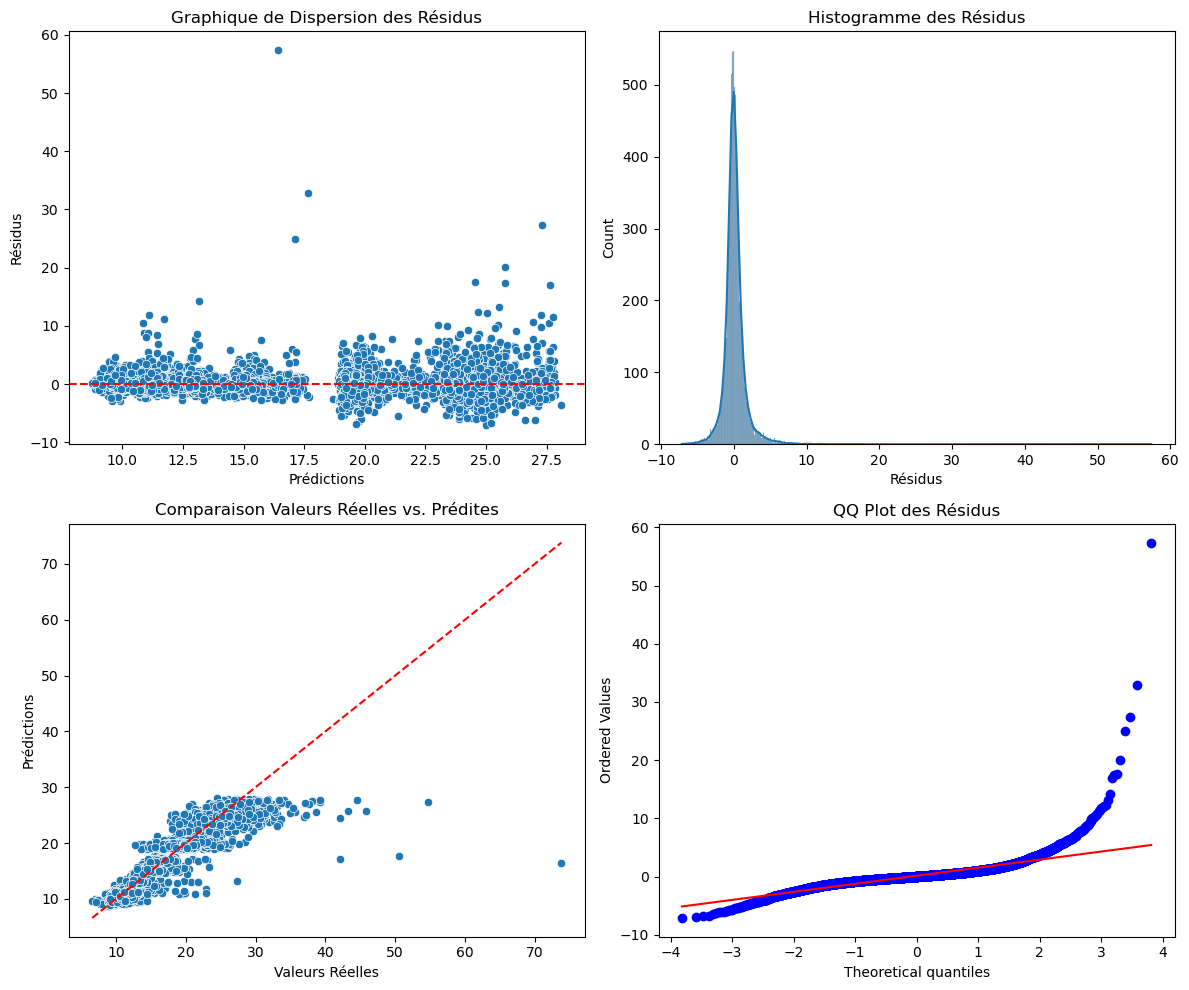

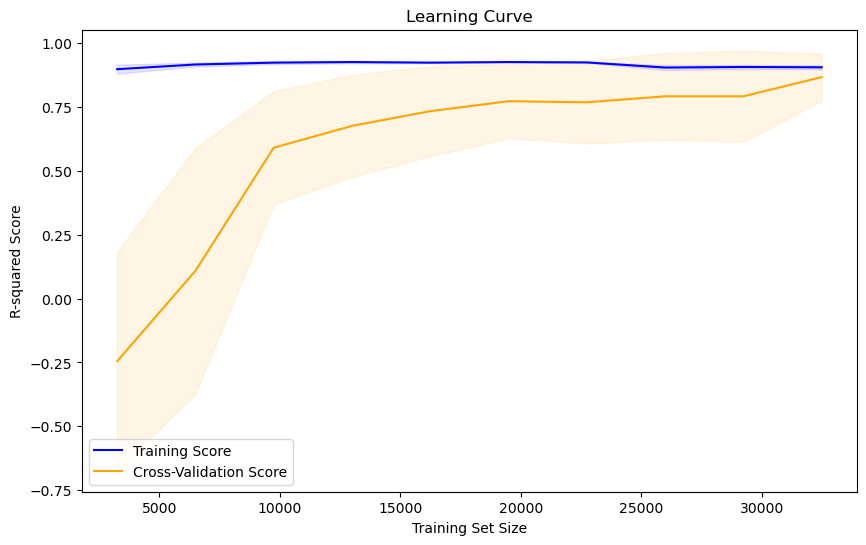

,Model,R2_train,R2_test,R2_full,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,Linear Regression,0.732603,0.739728,0.734398,2.221553,2.218191,7.896751,7.725284,2.810116,2.779440
1,Ridge,0.732603,0.739728,0.734398,2.221535,2.218173,7.896751,7.725277,2.810116,2.779438
2,Lasso,0.649106,0.657529,0.651229,2.315569,2.303777,10.362596,10.165073,3.219099,3.188271
3,Elastic Net,0.590461,0.598609,0.592517,2.495585,2.492363,12.094484,11.913902,3.477712,3.451652
4,KNN,0.927510,0.898339,0.920192,0.811771,0.968039,2.140772,3.017456,1.463138,1.737082
5,Decision Tree,0.902112,0.903396,0.902437,0.975603,0.978744,2.890810,2.867360,1.700238,1.693328
6,Random Forest,0.987103,0.907273,0.967071,0.339226,0.924228,0.380877,2.752273,0.617152,1.658998
7,SVR,0.903584,0.907273,0.904513,0.911533,0.914940,2.847346,2.752275,1.687408,1.658998


In [13]:
#TOUT COMPARER
#######################################################################

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import learning_curve

all_r2_train =[]
all_r2_test=[]
all_r2_full=[]
all_mae_train=[]
all_mae_test=[]
all_mse_train=[]
all_mse_test=[]
all_rmse_train=[]
all_rmse_test=[]
all_model = []

# Divise les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

# Crée une liste de tuples contenant le nom du modèle et l'instance du modèle
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha=1.0)),
    ('Lasso', Lasso(alpha=1.0)),
    ('Elastic Net', ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ('KNN', KNeighborsRegressor(n_neighbors=6)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=5)),
    ('Random Forest', RandomForestRegressor(n_estimators=150, max_depth=80,min_samples_split=2)),
    ('SVR', SVR(kernel='rbf',C=10,gamma="scale",degree=2)),
]
    
# Crée un pipeline pour chaque modèle
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalisation des caractéristiques
        ('model', model)  # Le modèle spécifique à tester
    ])
    
    # Entraîne le modèle sur les données d'entraînement
    pipeline.fit(X_train, y_train)
  
    # Si le modèle est linéaire, affichez les coefficients
    if 'Linear' in name or 'Lasso' in name or 'Ridge' in name or 'Elastic Net' in name:
        coefficients = pipeline.named_steps['model'].coef_
        feature_names = X.columns
        feature_importances = pd.Series(coefficients, index=feature_names)
        #print(f'{name} Feature Coefficients:')
        #print(feature_importances)
        
        # Trie les indices des caractéristiques par ordre d'importance
        indices = np.argsort(feature_importances)[::-1]
        # Affiche l'importance des caractéristiques
        plt.figure(figsize=(25, 6))
        plt.title("Importance des caractéristiques")
        plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
        plt.xlabel("Caractéristiques")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()

    # Si le modèle est un arbre de décision ou un Random Forest, affichez l'importance des caractéristiques
    if 'Decision Tree' in name or 'Random Forest' in name:
        importances = pipeline.named_steps['model'].feature_importances_
        feature_names = X.columns
        feature_importances = pd.Series(importances, index=feature_names)
        #print(f'{name} Feature Importances:')
        #print(feature_importances)
        
        # Trie les indices des caractéristiques par ordre d'importance
        indices = np.argsort(feature_importances)[::-1]
        # Affiche l'importance des caractéristiques
        plt.figure(figsize=(25, 6))
        plt.title("Importance des caractéristiques")
        plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
        plt.xlabel("Caractéristiques")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()

    if 'SVR' in name:
        support_vectors_coefficients = pipeline.named_steps['model'].dual_coef_
        feature_importances = np.abs(support_vectors_coefficients)
        print(f'{name} Support Vectors Coefficients:')
        print(feature_importances)

    # Fait des prédictions sur l'ensemble de test
    predictions = pipeline.predict(X_test)

    #fait les prédiction sur train
    y_train_pred = pipeline.predict(X_train)
    
    # Prédictions sur l'ensemble de données complet
    y_full_pred = pipeline.predict(X)

    # Calcul de R2 sur l'ensemble d'entraînement, l'ensemble de test et l'ensemble complet
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, predictions)
    r2_full = r2_score(y, y_full_pred)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    all_r2_full.append(r2_full)
    print(name)
    print("r2_train",r2_train)
    print("r2_test",r2_test)
    print("r2_full", r2_full)
    
    # Calcule le Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    # Affiche le MSE pour chaque modèle
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    # Calcul des métriques
    
    # jeu d'entraînement s
    mae_train = mean_absolute_error(y_train,y_pred_train)
    mse_train = mean_squared_error(y_train,y_pred_train,squared=True)
    rmse_train = mean_squared_error(y_train,y_pred_train,squared=False)
    
    # jeu de test s
    mae_test = mean_absolute_error(y_pred_test,y_test)
    mse_test = mean_squared_error(y_test,y_pred_test,squared=True)
    rmse_test = mean_squared_error(y_test,y_pred_test,squared=False)
    
    all_mae_train.append(mae_train)
    all_mae_test.append(mae_test)
    all_mse_train.append(mse_train)
    all_mse_test.append(mse_test)
    all_rmse_train.append(rmse_train)
    all_rmse_test.append(rmse_test)
    all_model.append(name)
    
    print('le mae train est :',mae_train)
    print('le mae test est :',mae_test,'\n')
    print('le mse train est :',mse_train)
    print('le mse test est :',mse_test,'\n')
    print('le rmse train est :',rmse_train)
    print('le rmse test est :',rmse_test)
    
    #graphique des résidues etc
    # Calculer les résidus
    residuals = y_test - y_pred_test

    # Créer un subplot 2x2
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Graphique de dispersion des résidus avec ligne horizontale à y=0
    sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0, 0])
    axes[0, 0].set_title("Graphique de Dispersion des Résidus")
    axes[0, 0].set_xlabel("Prédictions")
    axes[0, 0].set_ylabel("Résidus")
    axes[0, 0].axhline(y=0, color='r', linestyle='--')

    # Histogramme des résidus
    sns.histplot(residuals, ax=axes[0, 1], kde=True)
    axes[0, 1].set_title("Histogramme des Résidus")
    axes[0, 1].set_xlabel("Résidus")

    # Comparaison entre les Valeurs Réelles et Prédites avec ligne diagonale en rouge
    sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1, 0])
    axes[1, 0].set_title("Comparaison Valeurs Réelles vs. Prédites")
    axes[1, 0].set_xlabel("Valeurs Réelles")
    axes[1, 0].set_ylabel("Prédictions")
    axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

    # QQ plot des résidus
    stats.probplot(residuals, plot=axes[1, 1])
    axes[1, 1].set_title("QQ Plot des Résidus")

    # Ajuster les espaces entre les sous-graphiques
    plt.tight_layout()

    # Afficher le subplot
    plt.show()
    # Function to plot the learning curve
    
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    # Add labels and title
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()


data = {
    'Model': all_model,
    'R2_train': all_r2_train,
    'R2_test': all_r2_test,
    'R2_full': all_r2_full,
    'MAE_train': all_mae_train,
    'MAE_test': all_mae_test,
    'MSE_train': all_mse_train,
    'MSE_test': all_mse_test,
    'RMSE_train': all_rmse_train,
    'RMSE_test':all_rmse_test,
}

# Création du DataFrame à partir du dictionnaire
tableau_synthese = pd.DataFrame(data)
display(tableau_synthese)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Créez un pipeline pour SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des caractéristiques
    ('svr', SVR())  # Régression SVR
])

# Définissez la grille de paramètres à tester
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.1, 1, 10,"scale"]
}

# Utilisez GridSearchCV pour tester toutes les combinaisons de paramètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichez les meilleurs paramètres et le meilleur score
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Faites des prédictions sur l'ensemble de test avec le meilleur modèle trouvé
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Calculez le Mean Squared Error sur l'ensemble de test
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on test set:", mse)

Best parameters: {'svr__C': 10, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
Best MSE: 2.846788817862437
Mean Squared Error on test set: 2.885809987559611
